# Generalized Subspace Model

In [3]:
push!(LOAD_PATH, "../../src")

using Pkg
Pkg.activate("./")

using Plots

 Activating environment at `~/GithubRepositories/PPCA/examples/GSM/Project.toml`


## Data 

We will use the Peterson & Barney vowel formant data. 

In [4]:
URL = "https://www.cs.cmu.edu/afs/cs/project/ai-repository/ai/areas/speech/database/pb/pb.tgz"
outdir = mkpath("data")

# Download the data.
if ! ispath(joinpath(outdir, "pb.tgz")) run(`wget $URL -P $outdir`)end

# Extract the archive.
datafile = joinpath(outdir, "PetersonBarney", "verified_pb.data")
if ! ispath(datafile) run(pipeline(`tar xvf $outdir/pb.tgz -C $outdir`)) end

# Just for information.
run(`cat $(joinpath(outdir, "PetersonBarney", "HEADER"))`);

Original Peterson/Barney Data:

	33 Male
	28 Female
	15 Children
	------------
	76 Total

2 Repetitions of 10 Vowels = 1520 utterances


Format:

M/F/C	SPKR	Phoneme-Number	Phoneme-Ascii	F0	F1	F2	F3
1 - M	1-33
2 - F	34-61
3 - C	62-76

Asterisk in ARPABET phoneme field means utterance failed of unanimous identification
in listening test (26 listeners)

1	IY	[i]
2	IH	[I]
3	EH	[e]
4	AE	[ae]
5	AH	[^]
6	AA	[a]
7	AO	[o]
8	UH	[U]
9	UW	[u]
10	ER	[3]


In [5]:
speaker_types = Dict("1" => "male", "2" => "female", "3" => "children")
phones = Dict("1" => "IY", "2" => "IH", "3" => "EH", "4" => "AE", "5" => "AH",
              "6" => "AA", "7" => "AO", "7" => "UH", "8" => "UH", "9" => "UW",
              "10" => "ER")

function parse_line(line)
    fields = split(line)
    st = speaker_types[fields[1]]
    p = phones[fields[3]]
    F0 = parse(Float64, fields[5])
    F1 = parse(Float64, fields[6])
    F2 = parse(Float64, fields[7])
    F3 = parse(Float64, fields[8])
    (speaker_type=st, phone=p, F0=F0, F1=F1, F2=F2, F3=F3)
end

data = []
open(datafile, "r") do f
    for line in eachline(f) push!(data, parse_line(line)) end
end

println("# of samples: $(length(data))")

# of samples: 1520


To visualize the data, here is the reproduction of Fig. 8 in "Control Methods Used in a Study of the Vowels".

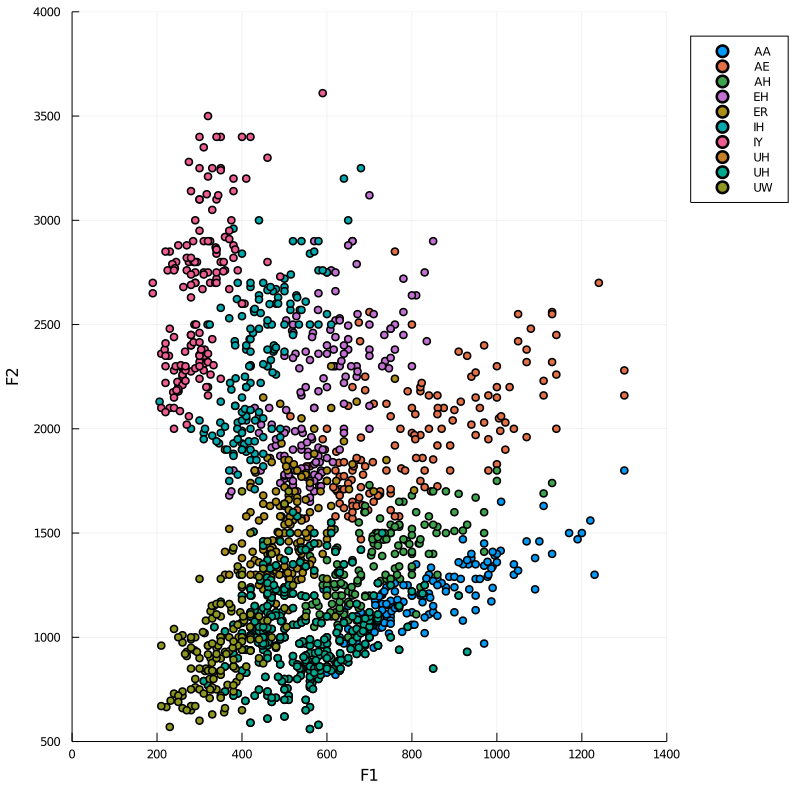

In [6]:
p = plot(size = (800, 800), xlabel = "F1", ylabel = "F2", legend = :outertopright,
         xrange = (0, 1400), yrange = (500, 4000))
for phone in sort(collect(values(phones)))
    subset = filter(t -> t[2] == phone, data)
    x = getproperty.(subset, [:F1])
    y = getproperty.(subset, [:F2])
    scatter!(x, y, label = phone)
end
p